## HW5(vision Undergraduate)

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

## Canny

In [40]:
def smoothing(img):
  output = img.copy()

  output = cv2.GaussianBlur(img, (5, 5), 1.3)

  return output

In [41]:
def comput_gradient(img):

  mag = np.zeros_like(img)
  angle = np.zeros_like(img)

  # we used library here#
  gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
  gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
     
  mag = np.sqrt(gx **2 + gy**2)
  angle = np.arctan2(gy,gx) * 180 / np.pi

  return mag,angle

In [42]:
def NMS(mag,angle):
  size = mag.shape
  output = np.zeros(size)
  for i in range(1, size[0] - 1):
      for j in range(1, size[1] - 1):
          if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
              value_to_compare = max(mag[i, j - 1], mag[i, j + 1])
          elif (22.5 <= angle[i, j] < 67.5):
              value_to_compare = max(mag[i - 1, j - 1], mag[i + 1, j + 1])
          elif (67.5 <= angle[i, j] < 112.5):
              value_to_compare = max(mag[i - 1, j], mag[i + 1, j])
          else:
              value_to_compare = max(mag[i + 1, j - 1], mag[i - 1, j + 1])
          
          if mag[i, j] >= value_to_compare:
              output[i, j] = mag[i, j]
  output = np.multiply(output, 255.0 / output.max())
  return output

In [43]:
def CheckConnection(img,x,y):
    for i in range(-1,2):
        for j in range(-1,2):
            if img.shape[1]>x + j>=0 and img.shape[0]>y + i>=0:
                if img[y + i,x + j] == 125:
                    img[y + i,x + j] = 255
                    CheckConnection(img,x+j,y+i)

In [44]:
def hysteresis_threshold(edges,min_th,max_th):
            
  ids = np.zeros_like(edges)

  weak_x, weak_y = np.where((edges > min_th) & (edges <= max_th))
  strong_x, strong_y = np.where(edges >= max_th)
  ids[strong_x, strong_y] = 255
  ids[weak_x, weak_y] = 125

  Ys,Xs = np.where(ids==255)
  for i in range(len(Ys)):
    CheckConnection(ids,Xs[i],Ys[i])
  Ys,Xs = np.where(ids==125)
  ids[Ys,Xs] = 0
  output = ids

  return output

In [45]:
def canny(img,min_th,max_th):
  smooth_img = smoothing(img)
  mag,angle = comput_gradient(smooth_img)
  edges = NMS(mag,angle)
  final_edges = hysteresis_threshold(edges,min_th,max_th)
  return final_edges

In [46]:
img = cv2.imread('traffic.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Text(0.5, 1.0, 'custom Canny')

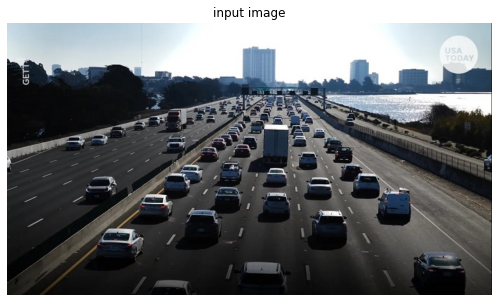

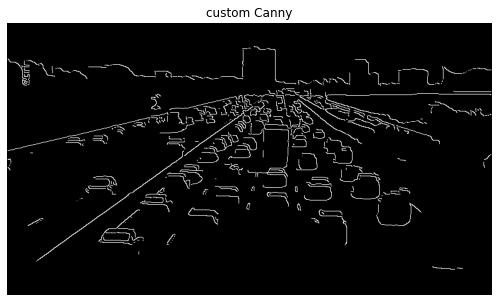

In [55]:
min_th,max_th = 50, 100
edges = canny(image_g,min_th,max_th)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(10,5))
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.title('custom Canny')